yt : [WARNING  ] 2016-02-24 17:40:59,067 Field ('gas', 'b2') already exists. To override use force_override=True.
yt : [WARNING  ] 2016-02-24 17:40:59,068 Field ('gas', 'b2v') already exists. To override use force_override=True.
yt : [WARNING  ] 2016-02-24 17:40:59,069 Field ('gas', 'drho') already exists. To override use force_override=True.
yt : [WARNING  ] 2016-02-24 17:40:59,530 Field ('gas', 'b2v') already exists. To override use force_override=True.
yt : [INFO     ] 2016-02-24 17:40:59,595 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-24 17:40:59,595 Parameters: domain_dimensions         = [129 321 513]
yt : [INFO     ] 2016-02-24 17:40:59,596 Parameters: domain_left_edge          = [-1.  0. -4.]
yt : [INFO     ] 2016-02-24 17:40:59,597 Parameters: domain_right_edge         = [ 1.  5.  4.]
yt : [INFO     ] 2016-02-24 17:40:59,598 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-24 17:41:00,965 xlim = 0.000000 5.000000
yt : [INFO     ] 20

List of arrays in this file: 
 KeysViewWithLock(<HDF5 file "usr790000.h5" (mode r)>)



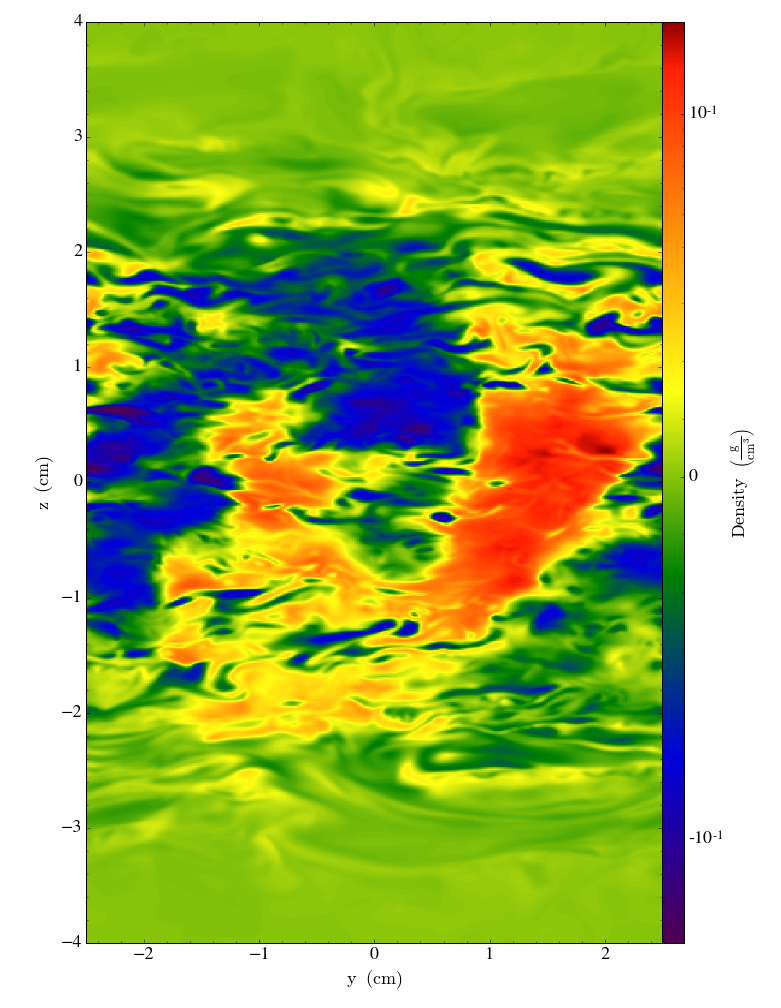

In [9]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import yt

from yt import derived_field


from matplotlib import font_manager 
font_manager.findfont('Times New Roman') 
#plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 


@derived_field(name = "b2", units = "code_magnetic**2")
def _b2(field, data):
    b2=data["b_x"]*data["b_x"] + data["b_y"]*data["b_y"]+ data["b_z"]*data["b_z"]
    return  b2 

@derived_field(name = "b2v", units = "code_magnetic**2 * code_length/code_time")
def _poynting(field, data):
    return  data["b2"]*data["velocity_z"]  


@derived_field(name = "drho", units = "code_mass / code_length**3")
def _drho(field, data):
    rho=data["density"]
    nx=rho.shape[0]
    ny=rho.shape[1]
    den1d=np.sum(rho,axis=(0,1))/nx/ny
    return  data["density"]-den1d  

def readnirv(num, dir2) : 
    numstr=str(num)
    numstrlz=str(num).zfill(6)
    with h5py.File(dir2+'usr'+numstrlz+'.h5','r') as hf:
        print('List of arrays in this file: \n', hf.keys())
        dens = hf.get('density')
        den = np.array(dens)
        bh=hf.get('magnetic_field')   
        vh=hf.get('velocity')   
        b=bh.value
        v=vh.value
        rho=(np.squeeze(den[:,:,:] ))
        nx=rho.shape[0]
        ny=rho.shape[1]
        den1d=np.sum(rho,axis=(0,1))/nx/ny
        #plt.plot(den1d) 
        rho=rho-den1d
        vx=(np.squeeze(v[:,:,:,0]))
        vy=(np.squeeze(v[:,:,:,1]))#-vy0
        vz=(np.squeeze(v[:,:,:,2]))
        bx=(np.squeeze(b[:,:,:,0]))
        by=(np.squeeze(b[:,:,:,1]))
        bz=(np.squeeze(b[:,:,:,2]))


    ds = dict(density = (rho, "code_mass/code_length**3"), 
        velocity_x = (vx, "code_length/code_time"), 
        velocity_y = (vy, "code_length/code_time"), 
        velocity_z = (vz, "code_length/code_time"),
        b_x = (bx, "code_magnetic"),
        b_y = (by, "code_magnetic"),
        b_z = (bz, "code_magnetic")
     )
        



    bbox = np.array([[-1., 1.], [0., 5.], [-4, 4]])
    yt.add_field("b2v", function=_poynting, units="code_magnetic**2 * code_length/code_time")
    ds = yt.load_uniform_grid(ds, den.shape, length_unit="", bbox=bbox, nprocs=32)
    return ds
    
    


hdir='/Users/gmurphy/Documents/results/'
simdir='/MRI-258-064+0-SPE_beta_y=1600,iso,OA/'
simdir='/MRI-258-064+0-SPE_beta_z=1600,iso,OA,NVF=0.06/'
simdir='/MRI-258-064+0-SPE_beta_z=1600,iso,OA/'
dir2=hdir+simdir

num=790000


ds = readnirv(num, dir2)


slc = yt.SlicePlot(ds, 'x', 'density')
slc.set_log('density', True)
slc.show()


ad=ds.all_data()



yt : [WARNING  ] 2016-02-24 17:43:43,455 Field ('gas', 'b2v') already exists. To override use force_override=True.
yt : [INFO     ] 2016-02-24 17:43:43,514 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-24 17:43:43,515 Parameters: domain_dimensions         = [129 321 513]
yt : [INFO     ] 2016-02-24 17:43:43,516 Parameters: domain_left_edge          = [-1.  0. -4.]
yt : [INFO     ] 2016-02-24 17:43:43,517 Parameters: domain_right_edge         = [ 1.  5.  4.]
yt : [INFO     ] 2016-02-24 17:43:43,518 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-24 17:43:44,707 xlim = 0.000000 5.000000
yt : [INFO     ] 2016-02-24 17:43:44,708 ylim = -4.000000 4.000000
yt : [INFO     ] 2016-02-24 17:43:44,711 xlim = 0.000000 5.000000
yt : [INFO     ] 2016-02-24 17:43:44,712 ylim = -4.000000 4.000000
yt : [INFO     ] 2016-02-24 17:43:44,715 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [WARNING  ] 2016-02-24 17:43:44,825 Plot image for

List of arrays in this file: 
 KeysViewWithLock(<HDF5 file "usr790000.h5" (mode r)>)



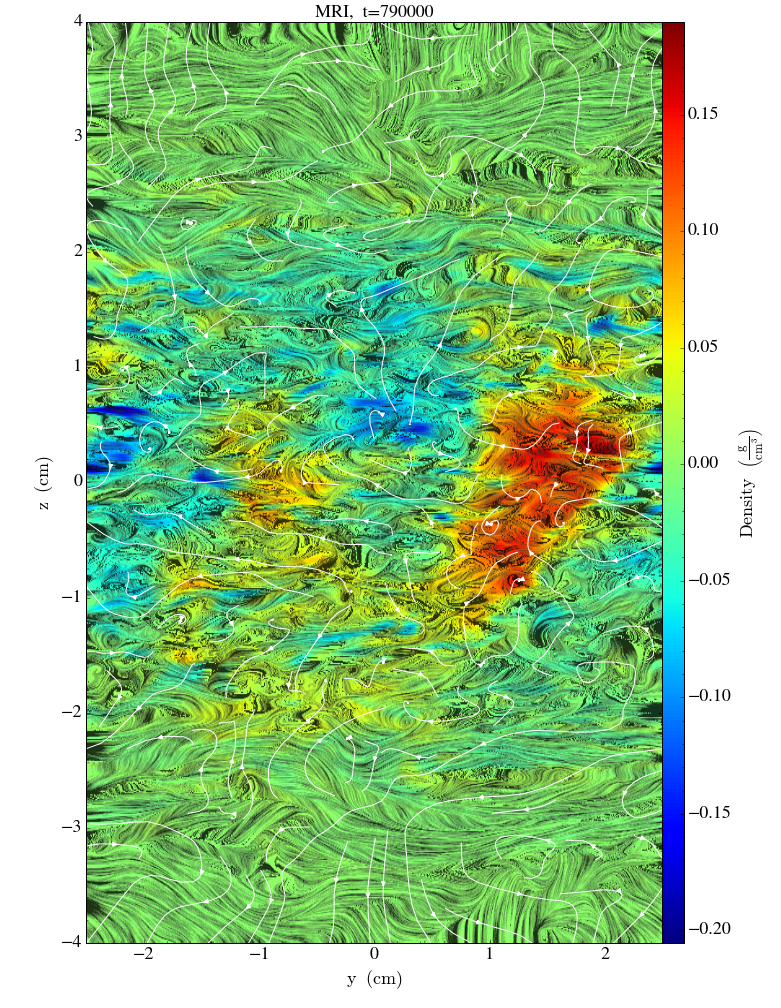

yt : [INFO     ] 2016-02-24 17:43:49,036 Saving plot MRI-258-064+0-SPE_beta_z=1600,iso,OA_790000_Slice_x_density.png


OSError: Unable to open file (Unable to open file: name = '/users/gmurphy/documents/results/mri-258-064+0-spe_beta_z=1600,iso,oa/usr792000.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [12]:
#plt.rcParams['image.cmap'] = 'viridis' 
nend=810000
nstep=2000
nstart=nend-nstep
nstart=790000
for num in range(nstart, nend,nstep):
    simdir='MRI-258-064+0-SPE_beta_z=1600,iso,OA'
    hdir='/Users/gmurphy/Documents/results/'
    dir2=hdir+simdir+'/'
    ds = readnirv(num, dir2)
    slc = yt.SlicePlot(ds, 'x', 'density')
    slc.set_log('density', False)
    slc.annotate_line_integral_convolution('b_y', 'b_z', lim=(0.5,0.65))
    slc.annotate_streamlines('velocity_y', 'velocity_z', plot_args={'color':'white'})
    slc.set_cmap(field="density", cmap='jet')
    slc.annotate_title( 'MRI,  t='+str(num))
    slc.show()
    slc.save(simdir+'_'+str(num).zfill(4))
